Snake game implimentation

In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt

GAME_DIMENSION = 10

def snake_game():

    #Game initilisation
    snake_list = [[GAME_DIMENSION // 2, GAME_DIMENSION // 2]]
    food_position = instantiate_food(snake_list)
    game_over = False
    display_frame(snake_list,food_position)

    #Game loop
    while game_over == False:

        #Get new head position based on valid user input
        valid_input = False
        while valid_input == False:
            direction = input("Please enter a valid direction (w,a,s,d)")
            match direction:
                case 'w':
                    valid_input = True
                    new_position = [snake_list[-1][0], snake_list[-1][1] + 1]
                case 'a':
                    valid_input = True
                    new_position = [snake_list[-1][0] - 1, snake_list[-1][1]]
                case 's':
                    valid_input = True
                    new_position = [snake_list[-1][0], snake_list[-1][1] - 1]
                case 'd':
                    valid_input = True
                    new_position = [snake_list[-1][0] + 1, snake_list[-1][1]]

        #Check for collisions
        if new_position[0] < 0 or new_position[0] >= GAME_DIMENSION or new_position[1] < 0 or new_position[1] >= GAME_DIMENSION:
            game_over = True
            display_frame([],[])
            print(snake_list)
            break
        if new_position in snake_list:
            game_over = True
            display_frame([],[])
            break

        #Check for food
        snake_list.append(new_position)
        if new_position == food_position:
            food_position = instantiate_food(snake_list)
        else:
            snake_list.pop(0)
        display_frame(snake_list,food_position)



def instantiate_food(snake_list):

    #Return a valid food position
    game_grid = [[x,y] for x in range(GAME_DIMENSION) for y in range(GAME_DIMENSION)]
    valid_grid = [position for position in game_grid if position not in snake_list]
    if not valid_grid:
        return []
    else:
        return random.choice(valid_grid)

def display_frame(snake_list, food_position):

    frame = np.zeros((GAME_DIMENSION, GAME_DIMENSION, 3), dtype=np.uint8)

    # Draw the frame
    if snake_list:
        for body in snake_list:
            frame[body[1], body[0]] = [0, 255, 0]  # Green for body
        frame[snake_list[-1][1], snake_list[-1][0]] = [0, 0, 255]  # Blue for head
    if food_position:
        frame[food_position[1], food_position[0]] = [255, 0, 0]  # Red for food

    plt.imshow(frame, interpolation='nearest', origin='lower')
    plt.axis('off')
    plt.show()

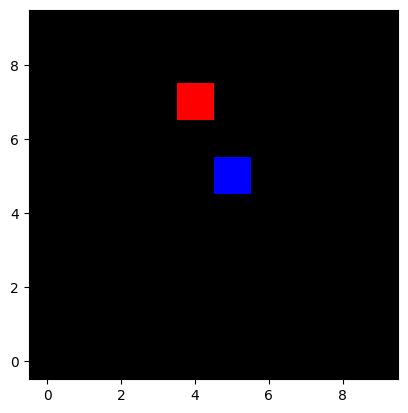

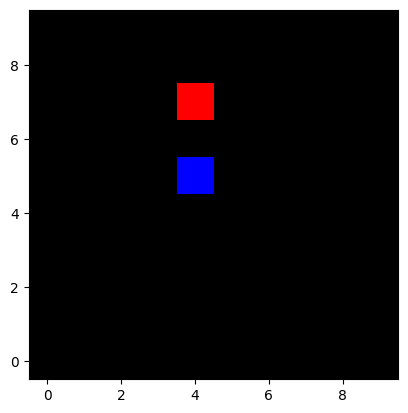

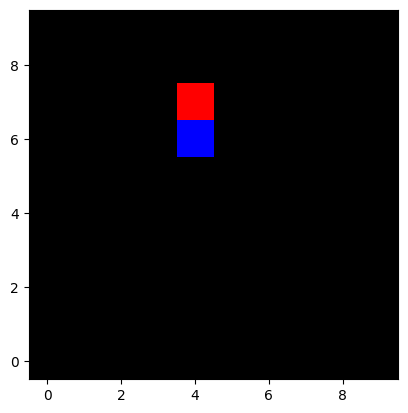

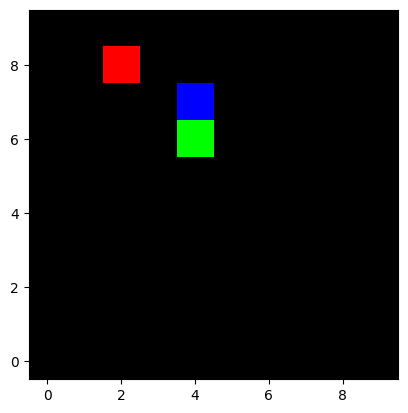

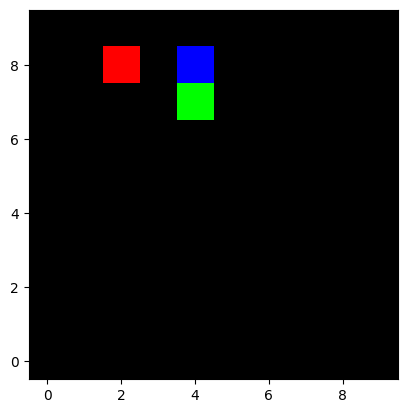

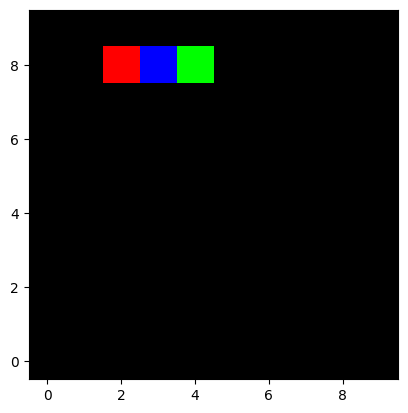

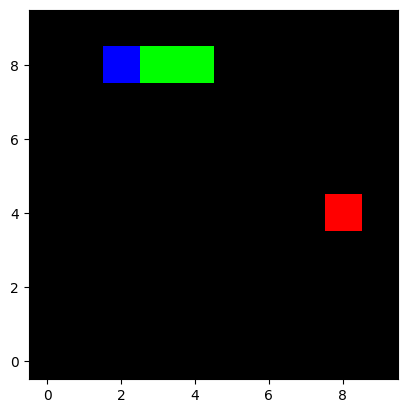

In [ ]:
snake_game()